In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score 

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout

from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the sea level data into a Pandas DataFrame
sea_level_df = pd.read_csv('/kaggle/input/sea-level/sealevel.csv')

In [3]:
# Separate the features and the target variable
X = sea_level_df.drop(['GMSL_noGIA'], axis=1)
y = sea_level_df['GMSL_noGIA']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# Train an XGBoost model to obtain feature importances
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

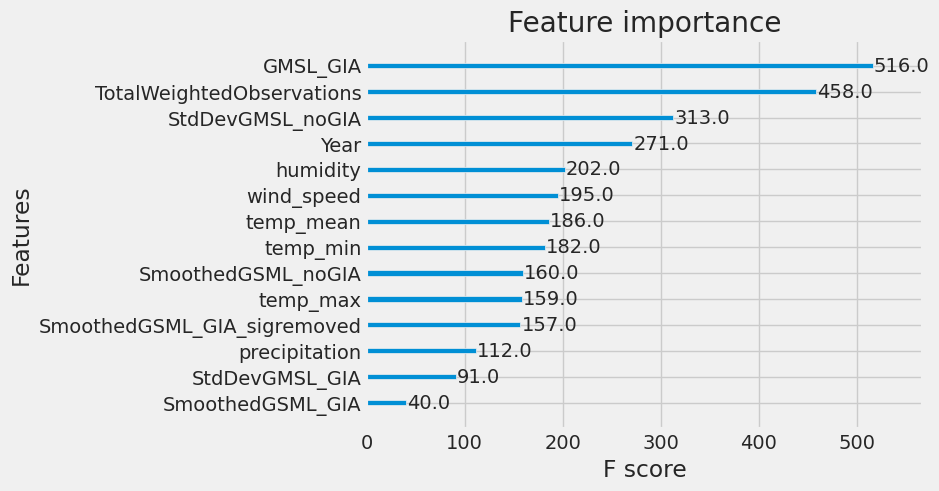

In [6]:
# Plot the feature importances
xgb.plot_importance(model)

In [7]:
# Select the most important features
selected_features = X.columns[model.feature_importances_ > 0.05]
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['GMSL_GIA'], dtype='object')


In [8]:
# Train a new model using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = xgb.XGBRegressor()
model_selected.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [9]:
# Evaluate the model on the testing set
y_pred = model_selected.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Coefficient of determination (R^2):', r2)

Mean squared error: 0.24411086638229432
Coefficient of determination (R^2): 0.999636992260377


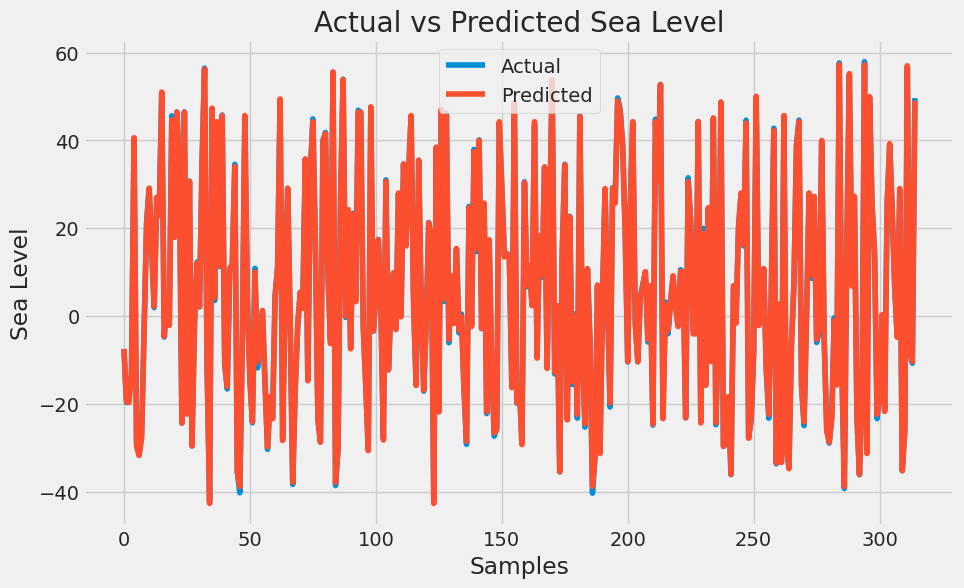

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Sea Level')
plt.xlabel('Samples')
plt.ylabel('Sea Level')
plt.legend()
plt.show()


In [11]:
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
GMSL_GIA


In [12]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [13]:
# Print results
print('Linear Regression Results:')
print('MSE:', mse_lr)
print('R2:', r2_lr)

Linear Regression Results:
MSE: 0.00023642659903409406
R2: 0.9999996484192344


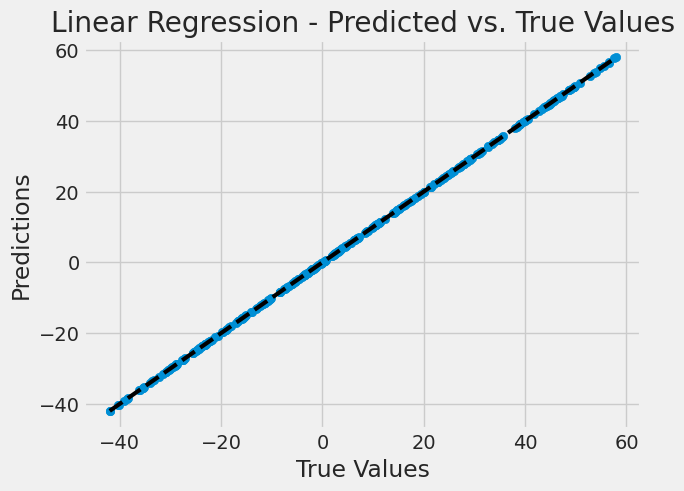

In [14]:
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression - Predicted vs. True Values')
plt.show()

In [15]:
# Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

In [16]:
print('\nRandom Forest Regression Results:')
print('MSE:', mse_rfr)
print('R2:', r2_rfr)


Random Forest Regression Results:
MSE: 0.2446799939047604
R2: 0.9996361459330564


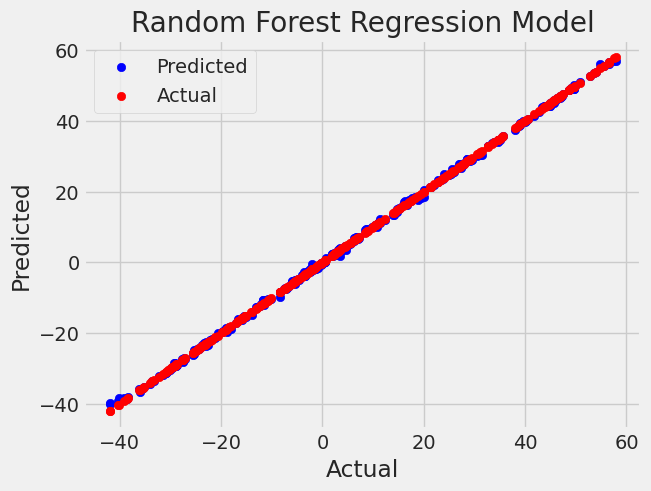

In [17]:
# Visualize Random Forest Regression predictions
plt.scatter(y_test, y_pred_rfr, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Random Forest Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [18]:
# K-Nearest Neighbors Regression model
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
mse_knr = mean_squared_error(y_test, y_pred_knr)
r2_knr = r2_score(y_test, y_pred_knr)

In [19]:
print('\nK-Nearest Neighbors Regression Results:')
print('MSE:', mse_knr)
print('R2:', r2_knr)


K-Nearest Neighbors Regression Results:
MSE: 282.38268685714286
R2: 0.5800797302315459


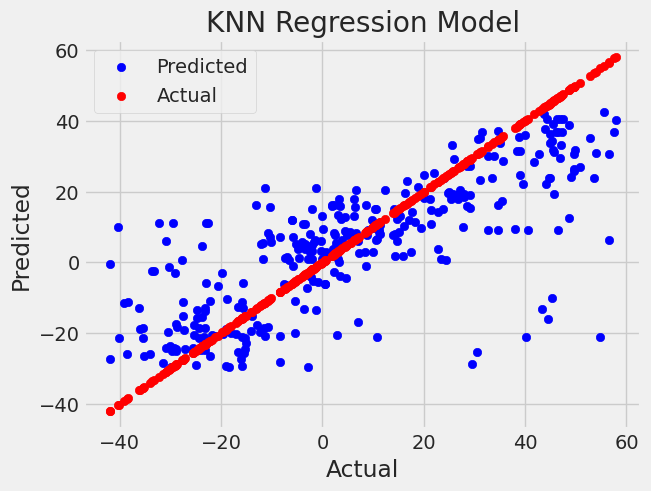

In [20]:
# Visualize KNN Regression predictions
plt.scatter(y_test, y_pred_knr, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('KNN Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [21]:
# Decision Tree Regression model
dtr = DecisionTreeRegressor(max_depth=10, random_state=0)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

In [22]:
print('\nDecision Tree Regression Results:')
print('MSE:', mse_dtr)
print('R2:', r2_dtr)


Decision Tree Regression Results:
MSE: 0.2756693062572237
R2: 0.9995900629364399


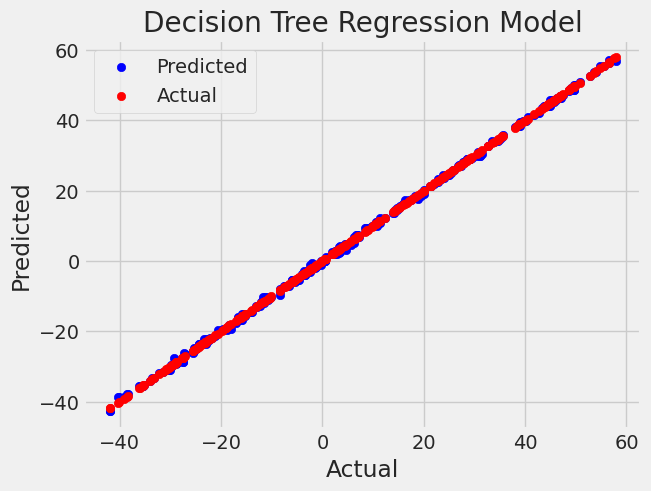

In [23]:
# Visualize Decision Tree Regression predictions
plt.scatter(y_test, y_pred_dtr, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Decision Tree Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import Lasso, Ridge


In [25]:
# Lasso Regression model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [26]:
# Print results
print('Lasso Regression Results:')
print('MSE:', mse_lasso)
print('R2:', r2_lasso)

Lasso Regression Results:
MSE: 0.009603885490539671
R2: 0.9999857184368104


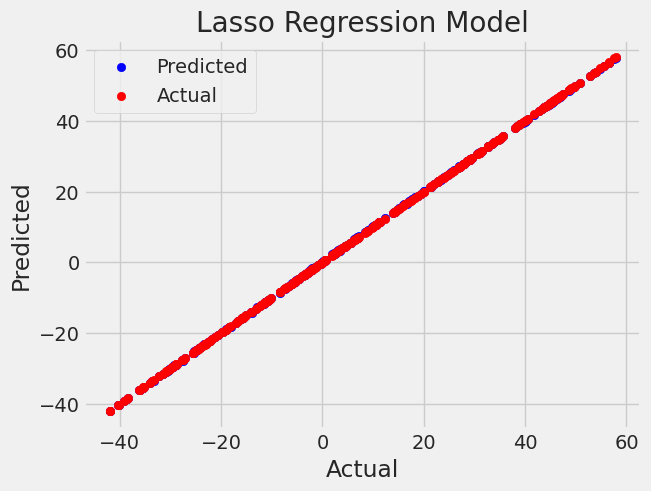

In [27]:
# Visualize Lasso Regression predictions
plt.scatter(y_test, y_pred_lasso, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Lasso Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [28]:
# Ridge Regression model
ridge = Ridge(alpha=0.1, max_iter=10000)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [29]:
# Print results
print('\nRidge Regression Results:')
print('MSE:', mse_ridge)
print('R2:', r2_ridge)


Ridge Regression Results:
MSE: 0.00025587564459585865
R2: 0.999999619497318


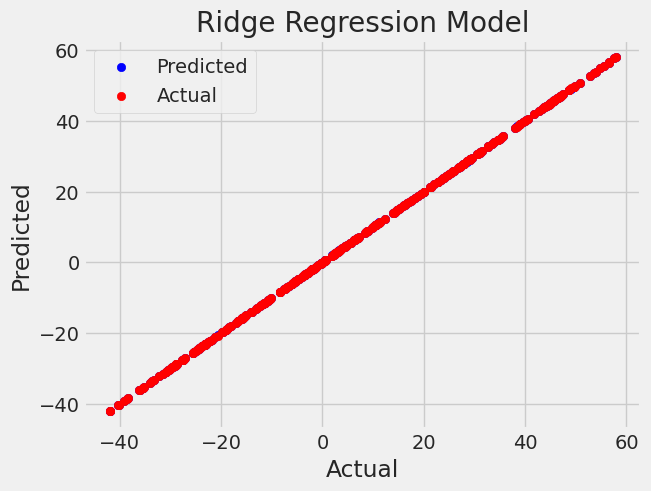

In [30]:
# Visualize Ridge Regression predictions
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.title('Ridge Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()